# MixSIAR results plotting and model performance - design specific

mixtures

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: viridisLite

## Load data

In [ ]:
grid <- read_csv(here::here("./notebooks/Mixtures_grid/grid_final_results.csv")) %>%
  mutate(sampling_design = "Grid")

Rows: 63000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): model_filename, run
dbl (4): prop_forest, alpha.prior, Agriculture, Forest
lgl (4): mix, source, discr, model

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 63000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): model_filename, run
dbl (4): prop_forest, alpha.prior, Agriculture, Forest
lgl (4): mix, source, discr, model

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 63000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): model_filename, run
dbl (4): prop_forest, alpha.prior, Agriculture, Forest
lgl (4): mix, source, discr, model

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Plotting

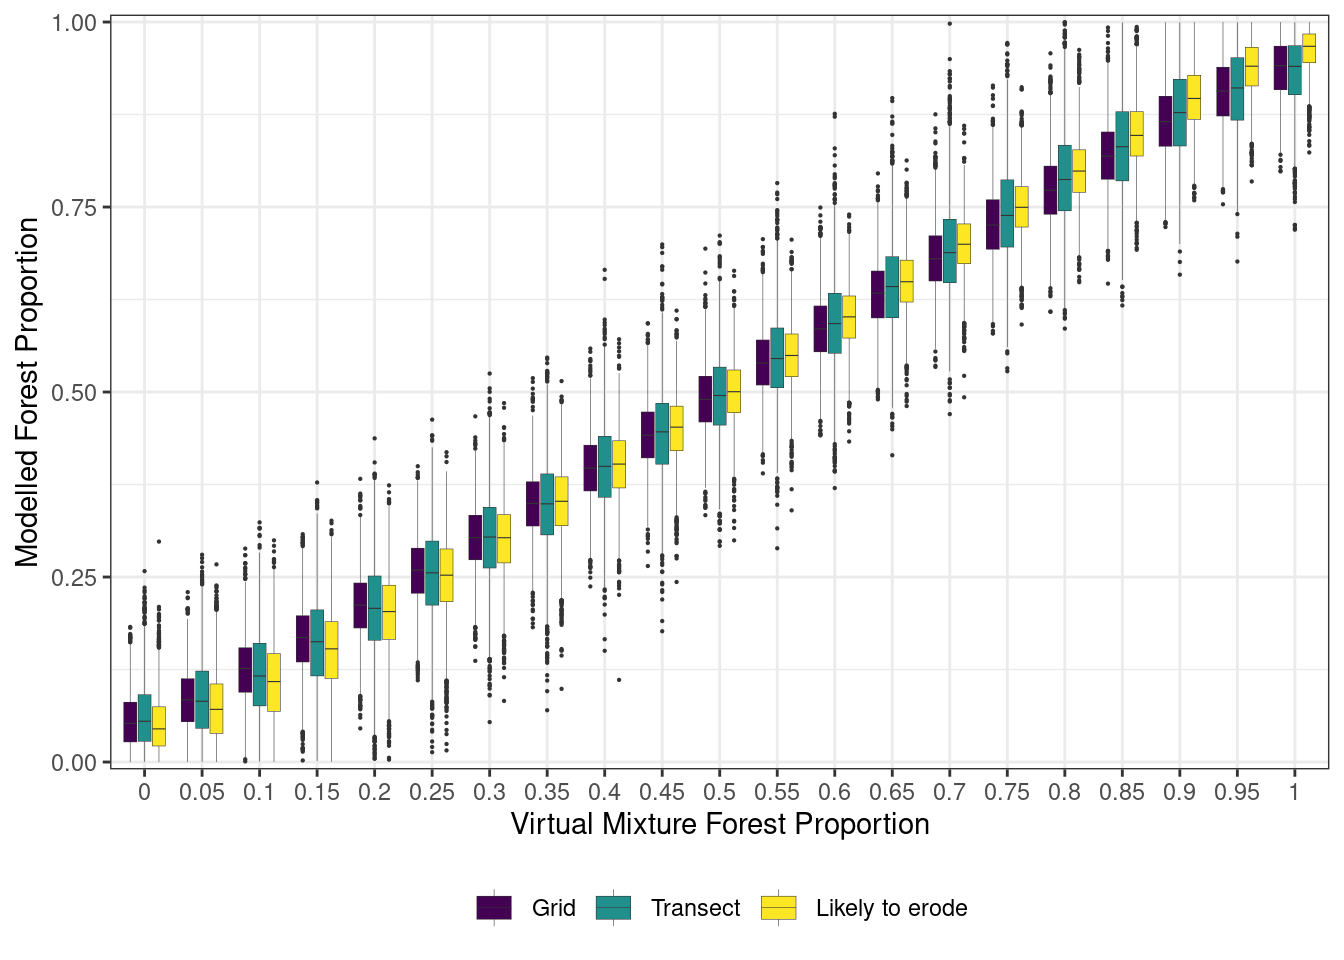

In [ ]:
supfig6 <- ggplot(data = all, aes(x = as.factor(prop_forest), y = Forest, fill = sampling_design)) +
  geom_boxplot(size = 0.1, outlier.size = 0.1) +
  theme_bw() +
  scale_y_continuous(expand = c(0,0.01)) +
  labs(y = "Modelled Forest Proportion", x ="Virtual Mixture Forest Proportion") +
  theme(legend.position = "bottom", legend.title = element_blank()) +
  scale_fill_viridis_d()
supfig6

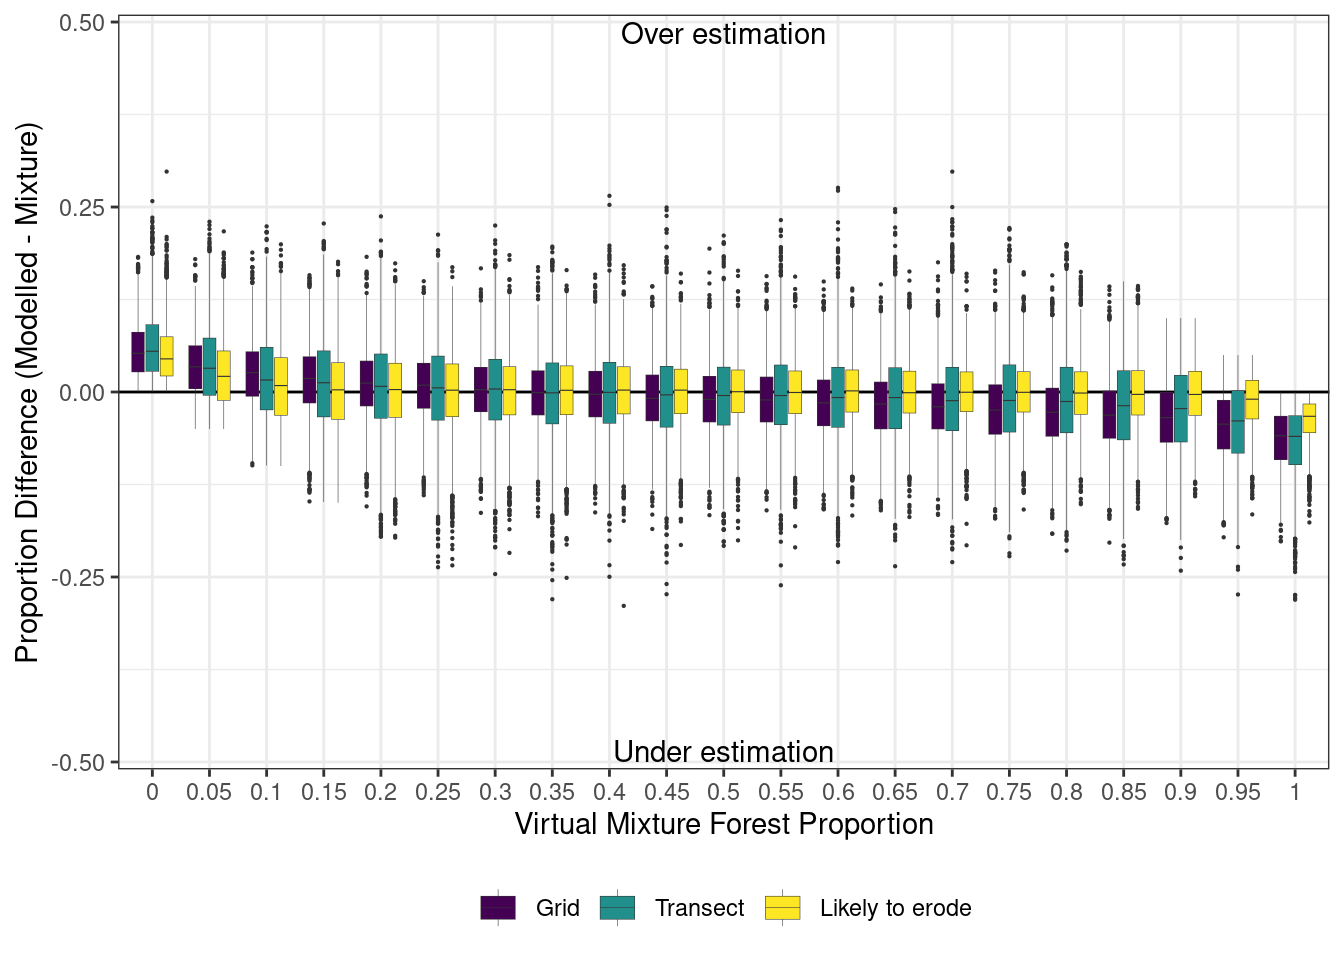

In [ ]:
supfig7 <- ggplot(data = all, aes(x = as.factor(prop_forest), y = Forest - prop_forest, fill = sampling_design)) +
  geom_hline(yintercept = 0) +
  geom_boxplot(size = 0.1, outlier.size = 0.1) +
  theme_bw() +
  scale_y_continuous(expand = c(0,0.01), limits = c(-0.5, 0.5)) +
  labs(y = "Proportion Difference (Modelled - Mixture)", x ="Virtual Mixture Forest Proportion") +
  theme(legend.position = "bottom", legend.title = element_blank()) +
  scale_fill_viridis_d() +
  annotate(geom = "text", x = "0.5", y = 0.5, label = "Over estimation", vjust = 1) +
  annotate(geom = "text", x = "0.5", y = -0.5, label = "Under estimation", vjust = 0)
supfig7

`summarise()` has grouped output by 'prop_forest', 'sampling_design'. You can
override using the `.groups` argument.

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.

# A tibble: 10 × 3
# Groups:   source [2]
   source      quartile           r
   <chr>       <chr>          <dbl>
 1 Agriculture 0.025 quantile 0.999
 2 Agriculture 0.25 quantile  1    
 3 Agriculture 0.5 quantile   1    
 4 Agriculture 0.75 quantile  1    
 5 Agriculture 0.975 quantile 1    
 6 Forest      0.025 quantile 1    
 7 Forest      0.25 quantile  1    
 8 Forest      0.5 quantile   1    
 9 Forest      0.75 quantile  1    
10 Forest      0.975 quantile 0.999

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.

# A tibble: 10 × 3
# Groups:   source [2]
   source      quartile           r
   <chr>       <chr>          <dbl>
 1 Agriculture 0.025 quantile 1    
 2 Agriculture 0.25 quantile  1    
 3 Agriculture 0.5 quantile   1    
 4 Agriculture 0.75 quantile  1    
 5 Agriculture 0.975 quantile 0.999
 6 Forest      0.025 quantile 0.999
 7 Forest      0.25 quantile  1    
 8 Forest      0.5 quantile   1    
 9 Forest      0.75 quantile  1    
10 Forest      0.975 quantile 1    

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.

# A tibble: 10 × 3
# Groups:   source [2]
   source      quartile           r
   <chr>       <chr>          <dbl>
 1 Agriculture 0.025 quantile 0.999
 2 Agriculture 0.25 quantile  1    
 3 Agriculture 0.5 quantile   1    
 4 Agriculture 0.75 quantile  1    
 5 Agriculture 0.975 quantile 0.999
 6 Forest      0.025 quantile 0.999
 7 Forest      0.25 quantile  1    
 8 Forest      0.5 quantile   1    
 9 Forest      0.75 quantile  1    
10 Forest      0.975 quantile 0.999

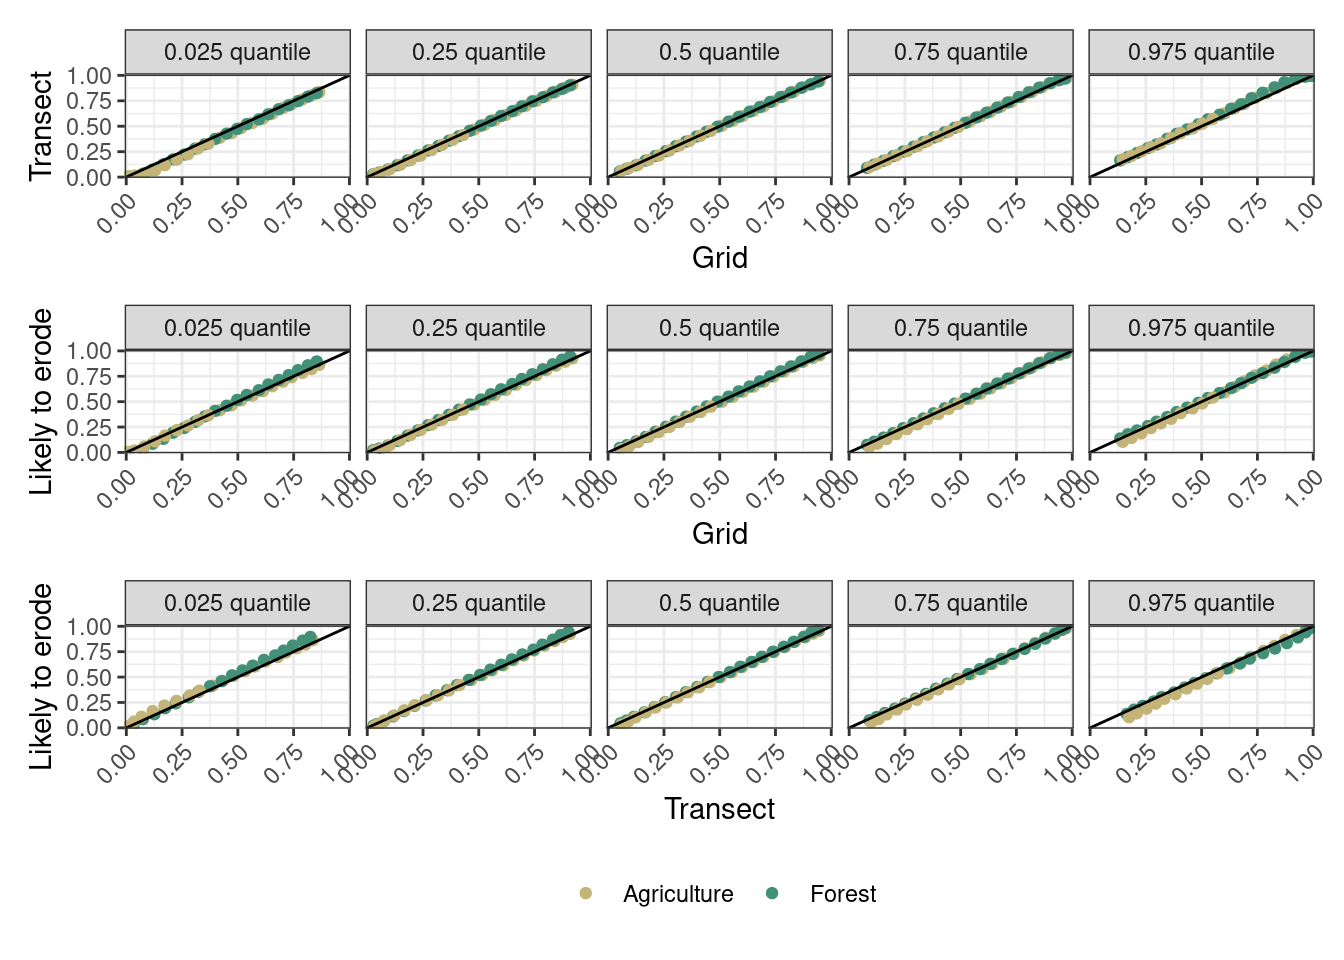

In [ ]:
plot1 <- all %>%
  select(prop_forest, Agriculture, Forest, sampling_design) %>%
  pivot_longer(cols = c(Agriculture,  Forest), names_to = "source", values_to = "value") %>%
  group_by(prop_forest, sampling_design, source) %>%
  summarise(`0.5 quantile` = median(value),
            `0.25 quantile` = quantile(value, 0.25),
            `0.75 quantile` = quantile(value, 0.75),
            `0.975 quantile` = quantile(value, 0.975),
            `0.025 quantile` = quantile(value, 0.025)) %>%
  pivot_longer(cols = `0.5 quantile`:`0.025 quantile`, names_to = "quartile", values_to = "value") %>%
  #filter(source == "Forest") %>%
  pivot_wider(names_from = sampling_design, values_from = value)

## Model performance

In [ ]:
summary_1 <- all %>%
  select(prop_forest, Agriculture, Forest, sampling_design) %>%
  pivot_longer(cols = c(Agriculture,  Forest), names_to = "source", values_to = "value") %>%
  group_by(sampling_design, prop_forest, source) %>%
  summarise(median = median(value),
            q25 = quantile(value, 0.25),
            q75 = quantile(value, 0.75),
            W50 = quantile(value, 0.75) - quantile(value, 0.25),
            W95 = quantile(value, 0.975) - quantile(value, 0.025),
            P50 = sum(value[value < quantile(value, 0.75) & value > quantile(value, 0.25)])/n(),
            P95 = sum(value[value < quantile(value, 0.975) & value > quantile(value, 0.025)])/n()) %>%
  group_by(sampling_design, source) %>%
  summarise(W50 = mean(W50),
            W95 = mean(W95),
            P50 = mean(P50),
            P95 = mean(P95))

`summarise()` has grouped output by 'sampling_design', 'prop_forest'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'sampling_design'. You can override using
the `.groups` argument.

`summarise()` has grouped output by 'prop_forest'. You can override using the
`.groups` argument.

`summarise()` has grouped output by 'prop_forest', 'prop_ag'. You can override
using the `.groups` argument.

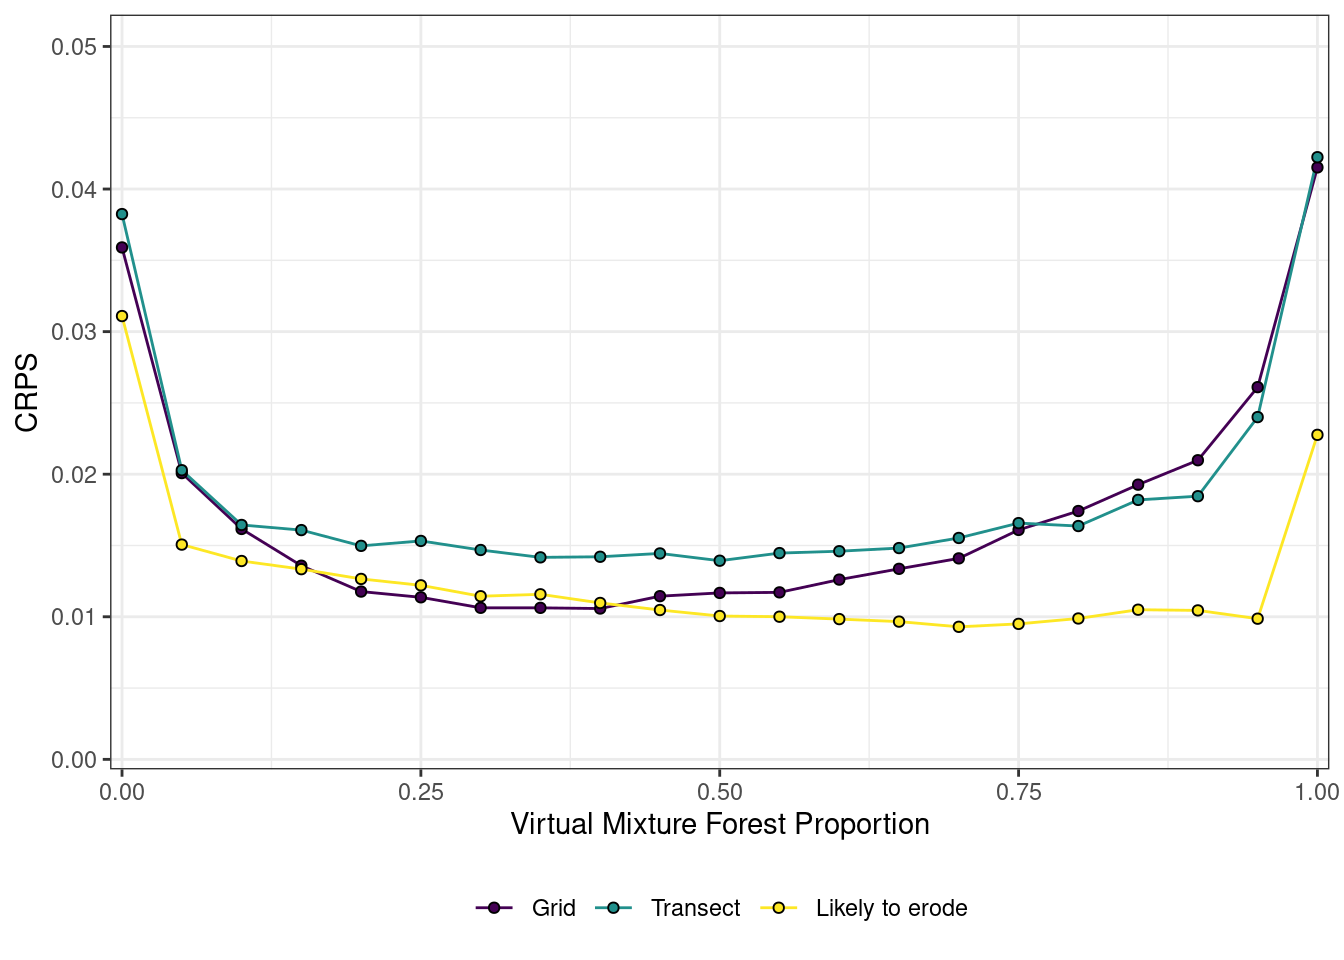

In [ ]:
supfig9 <- ggplot(data = CRPS_plot, aes(x = prop_forest, y = Forest, fill = sampling_design)) +
  geom_line(aes(colour = sampling_design)) +
  geom_point(shape = 21) +
  theme_bw() +
  scale_y_continuous(expand = c(0,0.01)) +
  scale_x_continuous(expand = c(0,0.01)) +
  scale_fill_viridis_d() +
  scale_colour_viridis_d() +
  theme(legend.position = "bottom", legend.title = element_blank()) +
  labs(x = "Virtual Mixture Forest Proportion", y = "CRPS") 
supfig9

In [ ]:
summary_3 <- all %>%
  select(prop_forest, Agriculture, Forest, sampling_design) %>%
  #mutate(prop_ag = 1 - prop_forest) %>%
  pivot_longer(cols = c(Agriculture,  Forest), names_to = "source", values_to = "value") %>%
  #pivot_longer(cols = c(prop_forest,  prop_ag), names_to = "proportion", values_to = "actual") %>%
  group_by(sampling_design, source, prop_forest) %>%
  mutate(error50 = ifelse(value >= quantile(value, 0.25) & value <= quantile(value, 0.75), 0,
                     ifelse(value < quantile(value, 0.25), quantile(value, 0.25) - value,
                            quantile(value, 0.75) - value)),
         error95 = ifelse(value >= quantile(value, 0.025) & value <= quantile(value, 0.975), 0,
                          ifelse(value < quantile(value, 0.025), quantile(value, 0.025) - value,
                                 quantile(value, 0.975) - value)),
         Main = value > .5,
         Main50 = quantile(value, 0.75) > .5,
         Main95 = quantile(value, 0.975) > .5,
         Hit50 = ifelse(Main == T & Main50 == T, T, F),
         Hit95 = ifelse(Main == T & Main95 == T, T, F),
         Miss50 = ifelse(Main == T & Main50 == F, T, F),
         Miss95 = ifelse(Main == T & Main95 == F, T, F),
         FA50 = ifelse(Main == F & Main50 == T, T, F),
         FA95 = ifelse(Main == F & Main95 == T, T, F)) %>%
  group_by(sampling_design, source) %>%
  summarise(MAE50 = mean(abs(error50)),
            MAE95 = mean(abs(error95)),
            ME50 = mean(error50),
            ME95 = mean(error95),
            NSE50 = 1 - (sum(error50^2)) / sum((value - mean(value))^2),
            NSE95 = 1 - (sum(error95^2)) / sum((value - mean(value))^2),
            CSI50 = sum(Hit50)/(sum(Hit50) + sum(Miss50) + sum(FA50)),
            CSI95 = sum(Hit95)/(sum(Hit95) + sum(Miss95) + sum(FA95)),
            HR50 = sum(Hit50) / (sum(Hit50) + sum(Miss50)),
            HR95 = sum(Hit95) / (sum(Hit95) + sum(Miss95)))

`summarise()` has grouped output by 'sampling_design'. You can override using
the `.groups` argument.

Joining with `by = join_by(sampling_design, source)`
Joining with `by = join_by(sampling_design, source)`

# A tibble: 15 × 8
   Parameter `Grid Agriculture` `Grid Forest` `Transect Agriculture`
   <chr>     <chr>              <chr>         <chr>                 
 1 MAE50     0.01               0.01          0.02                  
 2 MAE95     0.00               0.00          0.00                  
 3 ME50      0.00               0.00          0.00                  
 4 ME95      0.00               0.00          0.00                  
 5 NSE50     0.99               0.99          0.99                  
 6 NSE95     1.00               1.00          1.00                  
 7 CSI50     0.93               0.92          0.91                  
 8 CSI95     0.82               0.86          0.81                  
 9 HR50      0.98               0.99          0.97                  
10 HR95      1.00               1.00          1.00                  
11 CRPS      0.02               0.02          0.02                  
12 W50       0.06               0.06          0.08                  
13 W95       0.

In [ ]:
suptab7 <- summary_all |>
  group_by(`Evaluation criteria`) |>
  gt()|>
  tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_options(column_labels.font.weight = "bold")
suptab7

Parameter 
 Grid Agriculture 
 Grid Forest 
 Transect Agriculture 
 Transect Forest 
 Likely to erode Agriculture 
 Likely to erode Forest 
 
 
 
 
 Residuals 
 
 MAE50 
 0.01 
 0.01 
 0.02 
 0.02 
 0.01 
 0.01 
 MAE95 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 ME50 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 ME95 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 
 Performance 
 
 NSE50 
 0.99 
 0.99 
 0.99 
 0.99 
 0.99 
 0.99 
 NSE95 
 1.00 
 1.00 
 1.00 
 1.00 
 1.00 
 1.00 
 CRPS 
 0.02 
 0.02 
 0.02 
 0.02 
 0.01 
 0.01 
 
 Contingency 
 
 CSI50 
 0.93 
 0.92 
 0.91 
 0.91 
 0.93 
 0.93 
 CSI95 
 0.82 
 0.86 
 0.81 
 0.80 
 0.87 
 0.87 
 HR50 
 0.98 
 0.99 
 0.97 
 0.98 
 0.99 
 0.99 
 HR95 
 1.00 
 1.00 
 1.00 
 1.00 
 1.00 
 1.00 
 
 Uncertainty 
 
 W50 
 0.06 
 0.06 
 0.08 
 0.08 
 0.06 
 0.06 
 W95 
 0.18 
 0.18 
 0.24 
 0.24 
 0.18 
 0.18 
 P50 
 0.25 
 0.25 
 0.25 
 0.25 
 0.25 
 0.25 
 P95 
 0.48 
 0.47 
 0.48 
 0.47 
 0.47 
 0.48